# 关于性能退化问题的思考

关于性能退化问题的思考

从对数据的初步分析来看，可以将这些数据看作是离散的发动机状态空间点，每个状态点都有性能指标值。

由于样本是随机生成的，没有时间连续性，因此这里的性能退化预测问题本质是基于其他指标映射出性能指标的预测值。

关于回归问题先用经典的SVR（支持向量回归）依次实现（可以补充其他的机器学习方法）


# 数据处理


## 数据处理方法一
针对excel文件指定位置直接提取信息

In [1]:
# 以下代码仅适用于读取“不同效率 v0.xlsx”文件
import os
import xlrd
import re
from tkinter import _flatten
import numpy as np
path_root = r'D:/Works of Lab/2020-09-16_性能退化'

data = xlrd.open_workbook(path_root + '/original_data/不同效率 v0.xlsx')
table = data.sheets()[0] 

# 确定excel文件中各个表格的起始行row_start_table和中止行row_end_table
row_start_table = [2,23,39,55,72,88,104,120,136,152]
row_end_table = [18, 32, 47, 64, 80, 95, 109, 125, 140, 157]

row_x_ = [list(range(row_start_table[i]+4 , row_end_table[i]+1)) for i in range(10)]

sample_count = [row_end_table[i]-row_start_table[i]-3 for i in range(10)]

row_x = list(_flatten(row_x_))

# 提取X和y
X = []
Y = []
count_number = 0
for row_number_x in row_x:
    x = table.row_values(row_number_x-1, start_colx=1, end_colx=None)
    X.append(x)
    if row_number_x-4 in row_start_table:
        y_temp = table.row_values(row_number_x-5, start_colx=1, end_colx=None)
        y = [float(re.findall(r"\d+\.?\d*",y_temp[0])[1])]*sample_count[count_number]
        count_number = count_number + 1
        Y.extend(y)

X_np = np.array(X)
Y_np = np.array(Y)

# 划分数据集和数据集


In [9]:
# 以下代码仅适用于读取“不同效率 v1.xlsx”文件
import os
import xlrd
import re
from tkinter import _flatten
import numpy as np
path_root = r'D:/Works of Lab/2020-09-16_性能退化'

data = xlrd.open_workbook(path_root + '/original_data/不同效率 v1.xlsx')
table = data.sheets()[0] 

# 确定excel文件中各个表格的起始行row_start_table和中止行row_end_table
row_start_table = [2, 23, 39, 56, 73, 90, 107, 123, 139, 155]
row_end_table = [18, 36, 53, 69, 87, 104, 120, 136, 152, 168]

row_x_ = [list(range(row_start_table[i]+4 , row_end_table[i]+1)) for i in range(10)]

sample_count = [row_end_table[i]-row_start_table[i]-3 for i in range(10)]

row_x = list(_flatten(row_x_))

# 提取X和y
X = []
Y = []
count_number = 0
for row_number_x in row_x:
    x_1 = table.row_values(row_number_x-1, start_colx=3, end_colx=9)
    x_2 = table.row_values(row_number_x-1, start_colx=11, end_colx=12)
    x_3 = table.row_values(row_number_x-1, start_colx=15, end_colx=18)
    x_4 = table.row_values(row_number_x-1, start_colx=20, end_colx=22)
    x_5 = table.row_values(row_number_x-1, start_colx=23, end_colx=32)
    
    x = x_1 + x_2 + x_3 + x_4 + x_5
    X.append(x)
    
    if row_number_x-4 in row_start_table:
        y_temp = table.row_values(row_number_x-5, start_colx=1, end_colx=None)
        y = [float(re.findall(r"\d+\.?\d*",y_temp[0])[1])]*sample_count[count_number]
        count_number = count_number + 1
        Y.extend(y)

X_np = np.array(X)
Y_np = np.array(Y)




## 数据处理方法二
从规范后的excel文件中提取信息
数据处理方法二相对更具有广泛性，要求所提供的数据具备规范的表达模式。

In [59]:
# 数据处理方法二

# ——————新数据（验证集）导入与处理——————
#①规范式excel表选择数据处理方法二
import os
import xlrd
import re
from tkinter import _flatten

path_root = r'D:/Works of Lab/2020-09-16_性能退化'

# 读取改地址下所有文件名
file_names = os.listdir(path_root + '/Validation_set')
xlsx_file_names = []
for i in file_names:
    if i[-5:] == '.xlsx':
        xlsx_file_names.append(i)
print(xlsx_file_names)

X = []
Y = []
row_numbr_mark = 5

for xlsx_file_name in xlsx_file_names:
    data = xlrd.open_workbook(path_root + '/Validation_set/' + xlsx_file_name)
    table = data.sheets()[0]
    nrows = table.nrows
#     table = data.sheet_by_name('Sheet1')
    x_temp = []
    # 确定excel文件中代表运行状态x的行数的代表性能指标y的行数
    for row_number_x in range(row_numbr_mark, nrows+1):
        x_1 = table.row_values(row_number_x-1, start_colx=3, end_colx=9)
        x_2 = table.row_values(row_number_x-1, start_colx=11, end_colx=12)
        x_3 = table.row_values(row_number_x-1, start_colx=15, end_colx=18)
        x_4 = table.row_values(row_number_x-1, start_colx=20, end_colx=22)
        x_5 = table.row_values(row_number_x-1, start_colx=23, end_colx=32)
        
        x = x_1 + x_2 + x_3 + x_4 + x_5
        x_temp.append(x)
#         break
    y_temp = table.row_values(row_numbr_mark-5, start_colx=1, end_colx=None)
    y = [float(re.findall(r"\d+\.?\d*",y_temp[0])[1])]*len(x_temp)
    
    X.extend(x_temp)
    Y.extend(y)
X_np = np.array(X)
Y_np = np.array(Y)
# 划分训练集和测试集


['100%.xlsx', '91%.xlsx', '92%.xlsx', '93%.xlsx', '94%.xlsx', '95%.xlsx', '96%.xlsx', '97%.xlsx', '98%.xlsx', '99%.xlsx']


## 数据可视化
通过确定数据之间的关系类型（线性关系、指数关系、反比关系等）
从结果来看目标变量与诸多自变量之间的关系是复杂的，且样本数据是随机生成的，没有进行严格的控制变量设计，且针对燃气轮机这一复杂的非线性系统，单独讨论某两个变量之间的关系不具有很强的指导价值。

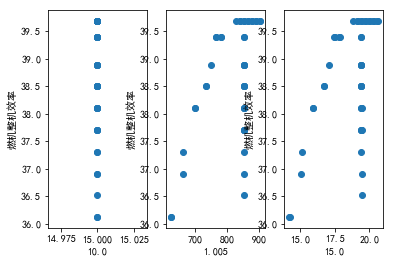

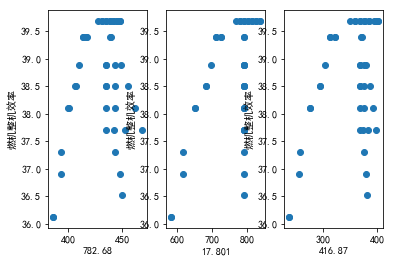

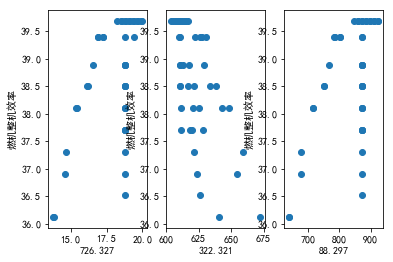

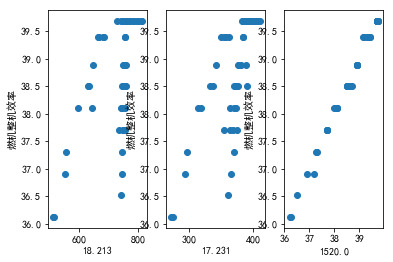

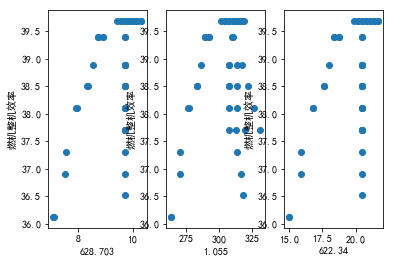

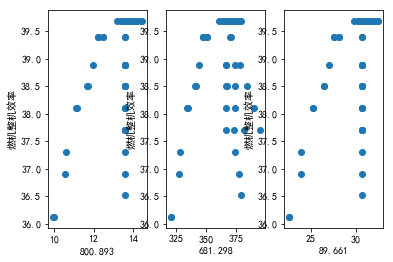

IndexError: index 20 is out of bounds for axis 0 with size 20

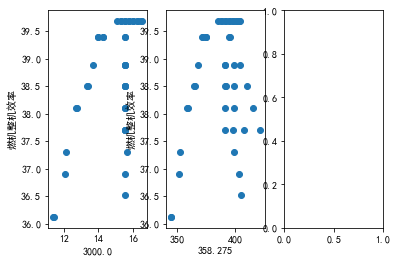

In [60]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
param_names = table.row_values(4, start_colx=1, end_colx=None)

fig_xcc = plt.Figure()
sub_plot = [131, 132, 133]
param_number_10_3 = np.array(range(30)).reshape(10,3)

# for i in range(10):
#     for j in range(3):
#         if 
#         plt.subplot(131)
#         k = param_number_10_3[i][j]
#         a = [X_np[m][k] for m in range(X_np.shape[0])]
#         b = Y_np[:]

#         plt.scatter(a,b)
#         plt.xlabel(param_names[k])
#         plt.ylabel("燃机整机效率")
#         plt.show()



for j in range(0,30,3):
    plt.subplot(sub_plot[0])
    a = [X_np[i][j] for i in range(X_np.shape[0])]
    b = Y_np[:]
    plt.scatter(a,b)
    plt.xlabel(param_names[j])
    plt.ylabel("燃机整机效率")
    
    plt.subplot(sub_plot[1])
    a = [X_np[i][j+1] for i in range(X_np.shape[0])]
    b = Y_np[:]
    plt.scatter(a,b)
    plt.xlabel(param_names[j+1])
    plt.ylabel("燃机整机效率")
    
    plt.subplot(sub_plot[2])
    a = [X_np[i][j+2] for i in range(X_np.shape[0])]
    b = Y_np[:]
    plt.scatter(a,b)
    plt.xlabel(param_names[j+2])
    plt.ylabel("燃机整机效率")
    
    plt.show()

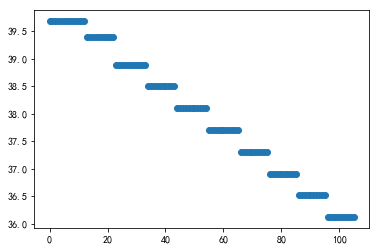

In [30]:
import matplotlib.pyplot as plt
plt.scatter(range(Y_np.shape[0]),Y_np)
plt.show()

# 模型搭建、训练与测试
回归问题的方法有：SVR


In [53]:
from sklearn.svm import SVR  # 构建支持向量回归所需的SVR模型
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # 用于数据预处理的数据放缩函数
from sklearn.externals import joblib

x_train, x_test, y_train, y_test = train_test_split(X_np, Y_np, test_size=0.3)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

svr = SVR(kernel='rbf')  # 构建基于rbf（径向基函数）的SVR模型
svr.fit(x_train, y_train)  # 将训练组数据输入进行训练
y_predict = svr.predict(x_test)  # 将处理过的预测组数据输入进行预测，得出结果
# 将实际结果与预测结果对比观察，2列的数组，左边列是实际结果，右边列是预测结果
result = hstack((y_test.reshape(-1, 1), y_predict.reshape(-1, 1)))

temp = 0

for i in range(len(result)):
    if abs(result[i][0]-result[i][1]) <= 0.3:
        temp = temp + 1 
# acc = sum([1 for i in range(len(result)) if abs(result[i][0]-result[i][0]) <0.05])/len(result)
acc = float(temp/len(result))
print(result)

if acc>=0.85:
    joblib.dump(svr, path_root + "/svr_model/svr_model_" + '{:.4f}'.format(acc) + ".m")
    print('acc超过0.85！')
print('预测准确率（效率误差阈值为0.3%）：',acc)

[[38.4997     38.69981415]
 [36.9117     37.1686814 ]
 [38.4997     38.54828199]
 [39.69       39.58324831]
 [36.9117     37.39157651]
 [39.69       39.59209681]
 [37.7055     37.98619827]
 [37.7055     37.83231999]
 [38.1024     38.28507626]
 [39.69       39.55327941]
 [37.7055     37.867461  ]
 [39.69       39.59792253]
 [38.4997     38.62582745]
 [37.3086     37.6708656 ]]
acc超过0.85！
预测准确率（效率误差阈值为0.2%）： 0.8571428571428571


D:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 模型的验证
模型应用前需要先完成模型搭建、训练和验证

新数据以excel的形式保存在\Validation_set地址下，方便代码读取。

①规范式excel表选择数据处理方法二，②不规范式excel表选择数据处理方法一。

***建 议 :***    验证集数据以规范形式的excel表格形式呈现，然后采用数据处理方法二进行处理

In [63]:
# ——————辅助函数——————
def bj_time():
  tz = pytz.timezone('Asia/Shanghai') #东八区
  t = datetime.fromtimestamp(int(time.time()),
    pytz.timezone('Asia/Shanghai')).strftime('%Y_%m_%d__%H_%M_%S %Z%z')
  beijing_time = t[:-9]
  return beijing_time


# ——————新数据（验证集）导入与处理——————
#①规范式excel表选择数据处理方法二
import os
import xlrd
import re
from tkinter import _flatten

path_root = r'D:/Works of Lab/2020-09-16_性能退化'

# 读取改地址下所有文件名
file_names = os.listdir(path_root + '/Validation_set')
xlsx_file_names = []
for i in file_names:
    if i[-5:] == '.xlsx':
        xlsx_file_names.append(i)
print(xlsx_file_names)

X = []
Y = []
row_numbr_mark = 5

for xlsx_file_name in xlsx_file_names:
    data = xlrd.open_workbook(path_root + '/Validation_set/' + xlsx_file_name)
    table = data.sheets()[0]
    nrows = table.nrows
#     table = data.sheet_by_name('Sheet1')
    x_temp = []
    # 确定excel文件中代表运行状态x的行数的代表性能指标y的行数
    for row_number_x in range(row_numbr_mark, nrows+1):
        x_1 = table.row_values(row_number_x-1, start_colx=3, end_colx=9)
        x_2 = table.row_values(row_number_x-1, start_colx=11, end_colx=12)
        x_3 = table.row_values(row_number_x-1, start_colx=15, end_colx=18)
        x_4 = table.row_values(row_number_x-1, start_colx=20, end_colx=22)
        x_5 = table.row_values(row_number_x-1, start_colx=23, end_colx=32)
        
        x = x_1 + x_2 + x_3 + x_4 + x_5
        x_temp.append(x)
#         break
    y_temp = table.row_values(row_numbr_mark-5, start_colx=1, end_colx=None)
    y = [float(re.findall(r"\d+\.?\d*",y_temp[0])[1])]*len(x_temp)
    
    X.extend(x_temp)
    Y.extend(y)
X_np = np.array(X)
Y_np = np.array(Y)

# ——————模型加载——————
svr_model_names = os.listdir(path_root + '/svr_model')
list_svr_acc = []
for svr_model_name in svr_model_names:
    svr_acc = svr_model_name[-9:-3]
    list_svr_acc.append(svr_acc)
best_acc = max(list_svr_acc)
# best_acc_model = 

svr = joblib.load(path_root + "/svr_model/svr_model_" + '{:.4f}'.format(1.0000) + ".m")

# ——————模型应用与验证—————
from sklearn.svm import SVR  # 构建支持向量回归所需的SVR模型
from numpy import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # 用于数据预处理的数据放缩函数


_, x_test, __, y_test = train_test_split(X_np, Y_np, test_size=45)

scaler = StandardScaler()
scaler.fit(x_test)
x_test = scaler.transform(x_test)

# svr = SVR(kernel='rbf')  # 构建基于rbf（径向基函数）的SVR模型
# svr.fit(x_train, y_train)  # 将训练组数据输入进行训练
y_predict = svr.predict(x_test)  # 将处理过的预测组数据输入进行预测，得出结果
# 将实际结果与预测结果对比观察，2列的数组，左边列是实际结果，右边列是预测结果
result = hstack((y_test.reshape(-1, 1), y_predict.reshape(-1, 1)))

temp = 0

for i in range(len(result)):
    if abs(result[i][0]-result[i][1]) <= 0.3:
        temp = temp + 1 
# acc = sum([1 for i in range(len(result)) if abs(result[i][0]-result[i][0]) <0.05])/len(result)
acc = float(temp/len(result))
print(result)
print('预测准确率（误差阈值为0.3%）：',acc)

['100%.xlsx', '91%.xlsx', '92%.xlsx', '93%.xlsx', '94%.xlsx', '95%.xlsx', '96%.xlsx', '97%.xlsx', '98%.xlsx', '99%.xlsx']
[[38.4997     38.27967127]
 [38.1024     38.08944527]
 [39.69       39.51962503]
 [39.39       39.25926602]
 [39.69       39.53009115]
 [36.9117     37.06442094]
 [39.69       39.5442362 ]
 [38.89       38.9463022 ]
 [39.69       39.519408  ]
 [37.7055     37.67272082]
 [39.69       39.54003033]
 [37.3086     36.74915442]
 [38.4997     38.45803089]
 [39.69       39.52144928]
 [38.4997     38.36675957]
 [38.4997     38.5402783 ]
 [36.1179     36.50263883]
 [39.39       39.13822332]
 [38.4997     38.51406913]
 [39.39       39.15589863]
 [39.39       39.26120064]
 [39.69       39.52522096]
 [38.1024     37.63171248]
 [38.1024     37.97977627]
 [39.69       39.54453615]
 [37.3086     37.37530809]
 [39.69       39.51949951]
 [37.7055     37.56856756]
 [39.69       39.52052006]
 [39.69       39.54608117]
 [39.39       39.32145137]
 [37.7055     37.74449458]
 [36.5148     